In [1]:
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
import numpy as np
import pandas as pd

2023-07-29 00:37:59.654138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-29 00:38:00.096564: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-29 00:38:01.644914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
housing = fetch_california_housing()
print(pd.DataFrame(housing.data))
print(pd.DataFrame(housing.target))

            0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]
           0
0      4.526
1      3.585
2      3.521
3      3.413
4      3.422
...      ...
20635  

In [13]:
X_orig = housing.data
Y_orig = housing.target
X_train, y_train = X_orig[0:12500], Y_orig[0:12500]
X_test, y_test = X_orig[12500:16500], Y_orig[12500:16500]
X_valid, y_valid = X_orig[16500:], Y_orig[16500:]

print(X_train.shape, X_test.shape, X_valid.shape)

(12500, 8) (4000, 8) (4140, 8)


In [22]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [33]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimiser, metrics=["RootMeanSquaredError"])

In [34]:
norm_layer.adapt(X_train)
history = model.fit(X_train,y_train, epochs=50, validation_data=(X_valid,y_valid))

Epoch 1/50
391/391 [==============================] - 2s 3ms/step - loss: 0.1727 - root_mean_squared_error: 0.4155 - val_loss: 0.5145 - val_root_mean_squared_error: 0.7173
Epoch 2/50
391/391 [==============================] - 1s 2ms/step - loss: 0.1701 - root_mean_squared_error: 0.4124 - val_loss: 0.5821 - val_root_mean_squared_error: 0.7630
Epoch 3/50
391/391 [==============================] - 1s 2ms/step - loss: 0.1709 - root_mean_squared_error: 0.4134 - val_loss: 0.5711 - val_root_mean_squared_error: 0.7557
Epoch 4/50
391/391 [==============================] - 1s 2ms/step - loss: 0.1691 - root_mean_squared_error: 0.4112 - val_loss: 0.5615 - val_root_mean_squared_error: 0.7493
Epoch 5/50
391/391 [==============================] - 1s 2ms/step - loss: 0.1703 - root_mean_squared_error: 0.4126 - val_loss: 0.6064 - val_root_mean_squared_error: 0.7787
Epoch 6/50
391/391 [==============================] - 1s 2ms/step - loss: 0.1695 - root_mean_squared_error: 0.4117 - val_loss: 0.6734 - val_

In [35]:
mse, rmse = model.evaluate(X_test,y_test)

125/125 [==============================] - 0s 1ms/step - loss: 1.1579 - root_mean_squared_error: 1.0761


In [36]:
y_pred = model.predict(X_test[:5])
print(y_pred, y_test[:5])

1/1 [==============================] - 0s 97ms/step
[[1.3045514]
 [1.300267 ]
 [1.3498774]
 [1.4643035]
 [1.5187002]] [2.132 1.589 1.567 1.317 1.319]


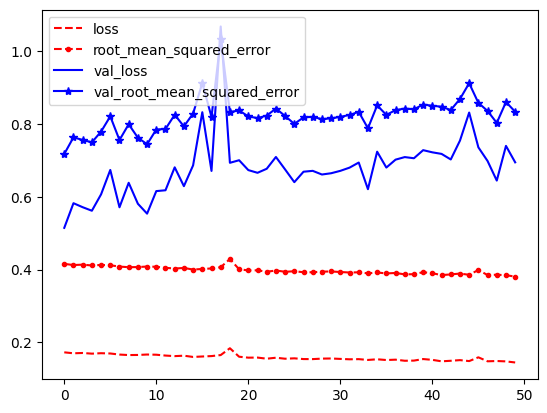

In [37]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(style=["r--", "r--.", "b-", "b-*"])
plt.show()